#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 2


### Name: Bozhou Yan


### Due: Oct. 16, 2019


## Goal:  The goal of this homework is to practice implementing a dual form of linear support vector machine without the optimizing algorithm.

Please DO NOT change the position of any cell in this assignment. Read every line till the end, and try your best to implement everything.

You will need the following packages below to do the homework.  Please DO NOT import any other packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Loading and spliting data (already finished).
For this assignment, we utilize the iris dataset from the sklearn library. It is 4-dimensional data with 3 classes, but we only use the first 2 dimensions with 2 classes to implement and illustrate our support vector machine model.
* Compared with the original example from https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py, we make the class labels as $\{1,-1\}$. So do not modify most things including random seed and training/test split.
* Feel free to print out some information of training/test data if you are curious.
* `X_train`, `y_train` are `features`, `labels` for training, while `X_test`, `y_test` are for test.

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]
y[y==2] = -1

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

dim_tr=len(X_train)


## 1. Finish the function of computing inner product $\langle u, v \rangle = u^\mathsf{T}v$
* Be careful with the dimension of input and output. The inner product of two vectors in a same dimension should be a scalar.
* Use `test_inner_product()` to test your function. Only if `Pass!` is printed out, your implementation might be fine.

In [3]:
def inner_product(vector_0, vector_1):
    """
    Compute the inner product of two vectors.
    
    intput:
        vector_0: np.ndarray(dim0,)
        vector_1: np.ndarray(dim0,)
    
    output:
        in_prdct: float
    """
    ##TODO-start##
    return np.dot(vector_0,vector_1)

    ##TODO-end##

def test_inner_product():
    v0 = np.array([0.12312, 0.5645, -0.3423])
    v1 = np.array([-0.3927, 0.28471, 0.12])
    
    assert abs(inner_product(v0, v1) - 0.071293571) < 1e-6
    
    print('Pass!')
    
test_inner_product()

Pass!


### 2. Finish the function of computing inner product matrix of training data.

For training data $X\in\mathbb{R}^{m\times d}, X_i\in\mathbb{R}^{d}$, we have the inner product matrix as
$$
\mathbf{A}=(a_{ij})\in\mathbb{R}^{m\times m}, a_{ij}=\langle X_i, X_j\rangle\in\mathbb{R}.
$$
* Note that, although there is already a numpy implementation of calculating such a matrix in a better form, you are required to implement it with the above `inner_product()` function for the future when we extend it for kernel functions (not in this assignment).

In [4]:
def inner_product_matrix(train_data):   
    """
    Compute the inner product matrix of two vectors.
    
    input:
        train_data: np.ndarray(nb_data, dim), nb_data data points in dimension of 'dim'
    
    output:
        res: np.ndarray(nb_data, nb_data), each entry is the inner product of the corresponding pair of vectors
    """

    ##TODO-start##
    n=train_data.shape[0]
    res=np.ndarray(shape=(n,n))
    for i in range(0,n):
        for j in range(0,n):
            res[i][j]=inner_product(train_data[i],train_data[j])
    
    return res

## 3. Finish target function of the dual form
Recall the target function of dual form is, where $\alpha\in\mathbb{R}^m$,
$$
\max_{\alpha} W(\alpha)=\sum_{i=1}^m \alpha_i - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}y_iy_j\alpha_i\alpha_j\langle X_i, X_j\rangle.
$$
However, since we do not manually implement the optimization algorithm in this assignment, we need to call a `scipy.optimize.minimize()` function to automatically optimize $\alpha$. (Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) 
* Note that the `minimize()` function is to minimize the target function, so we take a trick to get the target $\alpha$ here as
$$
\alpha^*=\text{argmax}_{\alpha}[W(\alpha)]=\text{argmin}_{\alpha}[-W(\alpha)].
$$

In [5]:
def target_function(alpha):
    """
    The target function of dual form.
    
    input:
        alpha: np.ndarray(nb_dim,), the parameter alpha we want to optimize
    
    output:
        target: float, value of the target function. Pay attention the sign of the function here with the above explanation.
    """
    
    ##TODO-start##
    res=0
    sum1=0
    sum2=0
    m=len(alpha)
    for i in range(0,m):
        sum1=sum1+alpha[i]
        
    for i in range(0,m):
        for j in range(0,m):
            sum2=sum2+alpha[i]*alpha[j]*y_train[i]*y_train[j]*inner_product(X_train[i],X_train[j])
            
    res=sum1-0.5*sum2
    res=-res
    return res
    ##TODO-end##

## 4. Initialization, bounds, constraints of parameters $\alpha$
Recall that (choose any $C>0$ you want)
* Bounds: $0\le\alpha_i\le C, i=1,\dots,m$.
* Constraints: $\sum_{i=1}^m \alpha_i y_i=0$.
* Initialization (suggested in SMO): $\alpha_i=0, i=1,\dots,m$.

Hence, you need to complete the programming of initializations, bounds, constraints to feed them into the `minimize()` function to finish the constrained optimization. Please carefully look into https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html for explanations. This page has all the information you need.

Hints:
* Read parameter explanations of `fun`, `x0`, `bounds`, `constraints` on the top, corresponding to target function, initialization, bounds, constraints.
* Imitate the last example of setting initilization, bounds, constraints on the bottom.
* If you want equality instead of inequality in constraints, change `'type': 'ineq', 'fun':` in `cons` to `'type': 'eq', 'fun':`
* Of course, in our case, bounds can also be viewed as a kind of constraints, but we suggest you follow the definitions above to make your programming easier for bounds.
* Equality constraint means that the constraint function result is to be zero whereas inequality means that it is to be non-negative.

In [9]:
C = 10

##TODO-start##
init = np.asarray(np.zeros(dim_tr))

bnds =[]
for i in range(0,dim_m):
    bnds.append((0,C))

def cons_fun(alpha):
    res=0
    for i in range(0,dim_m):
        res+=alpha[i]*y_train[i]
    return res

cons =({'type': 'eq', 'fun': lambda x: cons_fun(x)})
##TODO-end##

## 5. Call `minimize()` with your target function, initializaiton, bounds, constraints (already finished)
Please DO NOT change anything here, including the `method` parameter. May take **one minute** to finish calculation.

There are some facts you should know:
* `final_alpha` is the optimal $\alpha$ you get for the SVM model.
* `bias` is the bias term $b$ in SVM. You will learn how to update it in SMO algorithm. In this assignment, instead we directly calculate it with `final_alpha` as follow
$$
    b = \frac{\sum_{i=1}^{m}\left(y_i - \sum_{j=1}^m \alpha_i y_j \langle x_j, x_i)\right)}{m}
$$
* If your implementations above is perfect, there will not be an error thrown and it will show a figure similar to the first one in https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py (ignore a color swap).

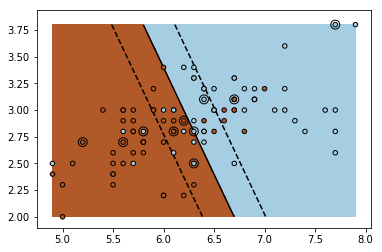

In [15]:
# Call the minimize() function
res = minimize(target_function, init, method='SLSQP', bounds=bnds,
               constraints=cons)

final_alpha = res.x

def SVM(x, alpha, b=0):
    sum = 0
    for i in range(X_train.shape[0]):
        sum += alpha[i] * y_train[i] * inner_product(X_train[i], x)
    
    sum += b
    
    return sum

bias = 0

for i in range(X_train.shape[0]):
    bias += y_train[i] - SVM(X_train[i], final_alpha, 0)

bias = bias / X_train.shape[0]

plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolor='k', s=20)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
            zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
XXYY = np.c_[XX.ravel(), YY.ravel()]
ZZ = []
for i in range(XXYY.shape[0]):
    ZZ.append(SVM(XXYY[i], final_alpha, bias))
    
Z = np.array(ZZ)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.show()

## 6. Estimate your linear SVM model (you need to implement)
Finally, let us estimate the performance of the linear SVM model. There are two numbers we need to calculate: accuracies on the training and test set. The SVM function $f()$ is provided above as `SVM()`. Its output for now is a float number for an input data point. You need to compare its sign with the label: if they are both positive or negative, it is correct, otherwise incorrect.

* $\text{Correct for data $i $?} = \text{if }y_i * f(X_i)>0$
* Call `SVM` in the form of `SVM(x, final_alpha, bias)` where `x` is the feature vector of **one** data point.
* **Print** the accuracies (in percentage or decimal), not just return it.

In [14]:
def estimate(data, labels):
    """
    The estimation function.
    
    input:
        data: np.ndarray(nb_data, dim), a bunch of data to predict with
        labels: np.ndarray(nb_data, ), the ground truth labels of data
    
    output:
        None.
        Print the accuracies
    """
    
    assert data.shape[0] == labels.shape[0]
    
    ##TODO-start##
    correct_pred=0
    for i in range(0,data.shape[0]):
        if labels[i]*SVM(data[i],final_alpha,bias)>0:
            correct_pred+=1
        
    print("Accruracy is: "+str(100*correct_pred/data.shape[0])+"%")
    
    ##TODO-end##
        
estimate(X_train, y_train)
estimate(X_test, y_test)

Accruracy is: 73.33333333333333%
Accruracy is: 70.0%


## 7.  Constrained Optimization

In this problem you will practice writing down the Lagrangians of different constrained optimization problems.

### Part (a)

Consider the constrained optimization problem
$$
\min_{x}\ x^TAx, \quad \text{ such that }\quad \|x\|^2 = 1
$$
where $A$ is a real, symmetric, and positive definite matrix.  Write down the Lagrangian and the system of equations that the stationary points must satisfy.

Answer goes here: Lagrangian: $\mathcal{L} (x, \lambda)=x^TAx - \lambda (||x||^2-1) $ .
 System of equations to solve: $2Ax-2\lambda x=0 $ and $||x||^2-1=0$

### Part (b)

What are the stationary points of the Lagrangian in terms of the matrix $A$?  In particular, what is the minimizer $x$ and minimal value?  

Answer goes here: The stationary points of the Lagrangian are the e.vectors of A. In this case x is the e.vector of A with $||x||^2=1$ and the min should equal $\lambda$ which is its corresponding e.value.

### Part (c)

Write down the Lagrangian and system of equations for the stationary points for the following constrained minimization problem.
$$
\min_{x,y} 10x^2 + 5y(y - 1), \quad \text{ such that }\quad x + y = 4
$$
What is the minimizer $(x,y)$?

Answer goes here: Lagrangian: $\mathcal{L} (x, y, \lambda)=10x^2+5y^2-5y - \lambda (x+y-4) $ .
 System of equations to solve: $20x-\lambda =0 $ ,$10y-5-\lambda =0 $ and $x+y-4=0$. Minimizer = ($\frac{7}{6},\frac{17}{6}$)